**导入相关模块**

In [1]:
import pandas as pd
import sklearn.model_selection as skmodel
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.models import load_model

**加载数据**

In [2]:
excel_path='./二分类问题.xlsx'
pain_data = pd.read_excel(excel_path,usecols=[1,2,3,4,5,6,7,8]) 
PLT=pain_data.values[:,1].reshape(215,1)
CA125=pain_data.values[:,2].reshape(215,1)
Neutrophile=pain_data.values[:,3].reshape(215,1)
Neutrophile_Percentage=pain_data.values[:,4].reshape(215,1)
Lymphocyte=pain_data.values[:,5].reshape(215,1)
Lymphocyte_Percentage=pain_data.values[:,6].reshape(215,1)
Albumin=pain_data.values[:,7].reshape(215,1)
pain_data.data=np.hstack((PLT,CA125,Neutrophile,Neutrophile_Percentage,Lymphocyte,Lymphocyte_Percentage,Albumin))
std=MinMaxScaler()
std.fit(pain_data.data)
pain_data_minmax=std.transform(pain_data.data)

C:\Users\Bunny\AppData\Local\Temp/ipykernel_19832/1730559341.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pain_data.data=np.hstack((PLT,CA125,Neutrophile,Neutrophile_Percentage,Lymphocyte,Lymphocyte_Percentage,Albumin))


**随机抽取50%的数据进行测试**

In [3]:
_ ,x_test, _ ,y_test = skmodel.train_test_split(pain_data_minmax, pain_data.CLASS,test_size=0.5)

**测试数据的大小**

In [4]:
x_test.shape

(108, 7)

**评价指标**

In [5]:
#精确率评价指标
def metric_precision(y_true,y_pred): 
    TP=tf.reduce_sum(y_true*tf.round(y_pred))
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
    precision=TP/(TP+FP)
    return precision
#召回率评价指标
def metric_recall(y_true,y_pred): 
    TP=tf.reduce_sum(y_true*tf.round(y_pred))
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
    recall=TP/(TP+FN)
    return recall

#特异性评价指标
def metric_specificity(y_true,y_pred): 
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    specificity=TN/(TN+FP)
    return specificity

#F1-score评价指标
def metric_F1score(y_true,y_pred): 
    TP=tf.reduce_sum(y_true*tf.round(y_pred))
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    F1score=2*precision*recall/(precision+recall)
    return F1score

**加载已经训练好的模型**

In [6]:
my_model = load_model('my_model_80%.h5',compile = False)
my_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy',
            metric_precision,
            metric_recall,
            metric_specificity,
            metric_F1score])

**随机测试8次的测试结果**

4/4 [==============================] - 0s 2ms/step - loss: 1.0389 - accuracy: 0.9167 - metric_precision: 0.9125 - metric_recall: 0.8513 - metric_specificity: 0.9517 - metric_F1score: 0.8767


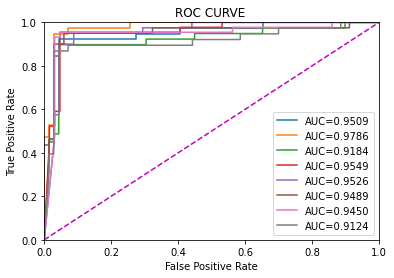

In [16]:
import numpy as np
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
plt.figure()
plt.title('ROC CURVE ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0, 1], [0, 1], color='m', linestyle='--')
for i in range(0,8):
    _ ,x_test, _ ,y_test = skmodel.train_test_split(pain_data_minmax, pain_data.CLASS,test_size=0.5)
    results = my_model.evaluate(x_test,y_test)
    #ROC坐标点计算
    
    FPR,TPR,threshold=roc_curve(y_test,my_model.predict(x_test),pos_label=1)
    #AUC值计算
    AUC=auc(FPR,TPR)
    #ROC曲线绘制
    plt.plot(FPR,TPR,label='AUC={:.4f}'.format(AUC))
    plt.legend()
    
plt.savefig('./pictures/ROC.jpg')

In [17]:
FPR

array([0.        , 0.01428571, 0.01428571, 0.02857143, 0.02857143,
       0.07142857, 0.07142857, 0.44285714, 0.44285714, 0.58571429,
       0.58571429, 0.7       , 0.7       , 0.88571429, 0.88571429,
       1.        ])

In [18]:
TPR

array([0.        , 0.31578947, 0.39473684, 0.39473684, 0.86842105,
       0.86842105, 0.89473684, 0.89473684, 0.92105263, 0.92105263,
       0.94736842, 0.94736842, 0.97368421, 0.97368421, 1.        ,
       1.        ])